In [1]:
%matplotlib inline
import matplotlib.pyplot as plt, seaborn as sn
import numpy as np
sn.set_context('paper')

### Sigmoid function

For limiting soil water drainage when water level drops below field capacity. Q = (V/T) * f(V)

The 'steepness' of the rise is dependent on the 'b' parameter. When b=1, have a steep rise, i.e. essentially a threshold with no runoff below field capacity (f(v) = 0), and f(V) = 1 above.

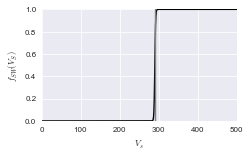

In [47]:
# Sigmoid function; b=1

fc = 290 # Field capacity (mm)
Vs = np.arange(0, 500, 0.1)
g_Vs = 1/(1 + np.exp(fc - Vs))

fig = plt.figure(figsize=(3.5,2))
ax = plt.plot(Vs, g_Vs, 'k-', label='Sigmoid function')
plt.axvline(fc, c='0.5', label='Tarland field capacity')
plt.xlabel('$V_s$')
plt.ylabel('$f_{SW}(V_S)$')
# plt.legend(loc='best')
plt.show()

However, if want to have some runoff to the stream and percolation to groundwater when the soil water level drops below field capacity, could decrease the b shape parameter. However, it mustn't be so small that f(V) > 0 when V = 0. How much to decrease it by to get the desired shape?

Field capacity is in the range 100 - 450 mm/m (sand to clay)(ref: ftp://ftp.dynamax.com/turf_irrigation/Soil%20Moisture%20Range%20Chart.pdf). Therefore plot f(V) for the upper and lower limits of field capacity with a variety of values of 'b'

When Vs = 0, b= 0.02, f_V = 0.11920
When Vs = 0, b= 0.04, f_V = 0.01799
When Vs = 0, b= 0.06, f_V = 0.00247
When Vs = 0, b= 0.08, f_V = 0.00034
When Vs = 0, b= 0.10, f_V = 0.00005


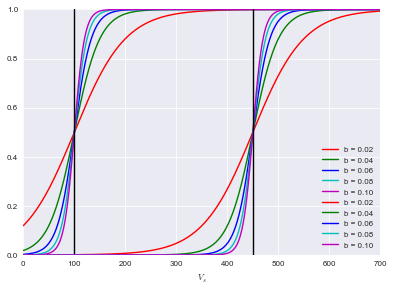

In [48]:
# Sigmoid function for limiting soil water drainage when water level drops below field capacity

fcs = [100., 450.] # 'True' field capacity (mm)
# fc = 3*(tfc/4)
bs = np.arange(0.02, 0.12, 0.02)
Vs = np.arange(0, 700, 0.1)
c = ['r','g','b','c','m','y']

for fc in fcs: 
    for idx, b in enumerate(bs):
        f_Vs = 1/(1 + np.exp(b*(fc - Vs)))
        plt.plot(Vs, f_Vs, color=c[idx], label='b = %.2f' %b)
        if fc == 100:
            # Check the value of f_Vs when Vs = 0:
            f_Vs0 = 1/(1 + np.exp(b*(100 - 0)))
            print 'When Vs = 0, b= %.2f, f_V = %.5f' %(b, f_Vs0)
    plt.axvline(fc, c='k')
plt.xlabel('$V_s$')
plt.legend(loc='best')
plt.show()


An alternative approach is to shift the curves leftwards relative to field capacity, so that don't have moisture limitation beginning until field capacity. But, there's then an issue of one value of b not being suitable at all possible field capacities; may end up with f(V) > 0 when V=0; just what we're trying to avoid.

When Vs = 0, b= 0.02, f_V = 0.11920
When Vs = 0, b= 0.04, f_V = 0.01799
When Vs = 0, b= 0.06, f_V = 0.00247
When Vs = 0, b= 0.08, f_V = 0.00034
When Vs = 0, b= 0.10, f_V = 0.00005
When Vs = 0, b= 0.12, f_V = 0.00001


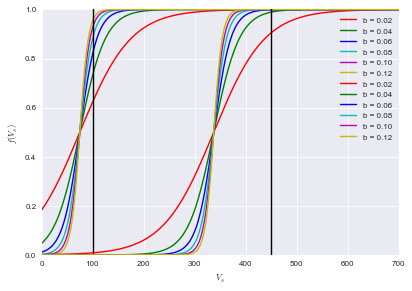

In [49]:
fcs = [100., 450.] # 'True' field capacity (mm)
ks = [0.90, 0.95, 0.99, 0.999] # Selection of values for k
Vs = np.arange(0, 700, 0.1)
c = ['r','g','b','c','m','y']
ls_d = {0:'-', 1:'--'}

fig = plt.figure(figsize=(3.5,2.5))
for ii, fc in enumerate(fcs): 
    for idx, k in enumerate(ks):
        mu = -np.log(1-k)/fc
        f_Vs = 1 - np.exp(-mu*Vs)
        if ii == 0:
            plt.plot(Vs, f_Vs, color=c[idx], ls=ls_d[ii], label='$k: %.3f$' %k)
        else:
            plt.plot(Vs, f_Vs, color=c[idx], ls=ls_d[ii])
#         if fc == 100:
#             # Check the value of f_Vs when Vs = 0:
#             f_Vs0 = 1/(1 + np.exp(b*(100 - 0)))
#             print 'When Vs = 0, b= %.2f, f_V = %.5f' %(b, f_Vs0)
    plt.axvline(fc, c='k')
plt.xlabel('$V_s$', fontsize=9)
plt.ylabel('$f_E(V_S)$', fontsize=9)
legend = plt.legend(loc='best', prop={'size':6}, frameon=True, title='Value of k')
plt.setp(legend.get_title(),fontsize='x-small')
# plt.show()
plt.savefig(r'M:\Working\NewModel\Conceptual_Diagrams\ET_exponential.png',bbox_inches='tight',dpi=300)
plt.close()


tfcs = np.array([100., 450.]) # 'True' field capacity (mm)
fcs = 3*(tfcs/4.)
bs = np.arange(0.02, 0.14, 0.02)
Vs = np.arange(0, 700, 0.1)
c = ['r','g','b','c','m','y']

for ii, fc in enumerate(fcs): 
    for jj, b in enumerate(bs):
        f_Vs = 1/(1 + np.exp(b*(fc - Vs)))
        plt.plot(Vs, f_Vs, color=c[jj], label='b = %.2f' %b)
        if ii == 0:
            # Check the value of f_Vs when Vs = 0:
            f_Vs0 = 1/(1 + np.exp(b*(100 - 0)))
            print 'When Vs = 0, b= %.2f, f_V = %.5f' %(b, f_Vs0)
    plt.axvline(tfcs[ii], c='k')
plt.xlabel('$V_s$')
plt.ylabel('$f(V_s)$')
plt.legend(loc='best')
plt.show()

### Soil water volume control - alternative to sigmoid

Sigmoid results in negative flows when soil water volume is nearly at field capacity. To solve this:

From Magnus, Jan 2019:

I don't really think we need a smooth (infinitely differentiable) function for this. We only need it to have continuous derivatives of 1-2 orders. So we could have a piecewise polynomial instead satisfying:

f(x) = 0 for x < T (T is threshold, in our case field capacity)

f(x) = 1 for x > T + d (d is "activation distance")

f(x) = g(x) for T <= x <= T + d

where g(x) is a polynomial satisfying g(T) = 0, g(T+d) = 1 and dg/dt = 0 at T and T+d (and maybe also second order derivative)

Here is the control function if we only need first order continuous derivatives (I don't think we need more), where reld is the “activation distance” relative to the threshold, in our case field capacity (FC), d is the activate distance:

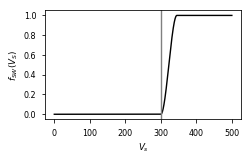

In [19]:
def f_x(x, FC, reld=0.15) :
    def f_x0(x): return -2*x**3 + 3*x**2
    d = FC*reld
    if x < FC       : return 0
    if x > FC + d : return 1
    else: return f_x0( (x-FC) / d )
    
t = control(Vg/Tg, min_Q, 0.01)
Qg = (1-t)*min_Q + t*Vg/Tg


FC = 300. # Field capacity (mm)
reld = 0.15
Vs = np.arange(0, 500, 0.1)
g_Vs = []
for i, val in enumerate(Vs):
    g_Vs_i = f_x(Vs[i], FC)
    g_Vs.append(g_Vs_i)
    

# Plot
fig = plt.figure(figsize=(3.5,2))
ax = plt.plot(Vs, g_Vs, 'k-', label='Piecewise polynomial')
plt.axvline(FC, c='0.5', label='Tarland field capacity')
plt.xlabel('$V_s$')
plt.ylabel('$f_{SW}(V_S)$')
# plt.legend(loc='best')
plt.show()

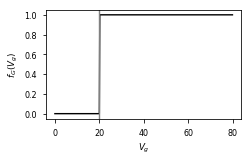

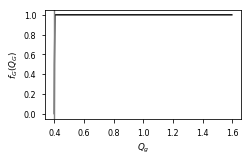

In [41]:
def f_x(x, threshold, reld) :
    def f_x0(x): return -2*x**3 + 3*x**2
    d = threshold*reld
    if x < threshold       : return 0
    if x > threshold + d : return 1
    else: return f_x0( (x-threshold) / d )
    
Vg = np.arange(0, 80, 0.1)
Tg = 50.
min_Q = 0.4 # mm/d

g_Vg = []
Qg = []
for i, val in enumerate(Vg):
    g_Vg_i = f_x(Vg[i]/Tg, min_Q, 0.01)
    g_Vg.append(g_Vg_i)
    Qg_i = (1-g_Vg_i)*min_Q + g_Vg_i*Vg[i]/Tg
    Qg.append(Qg_i)

# Plot
fig = plt.figure(figsize=(3.5,2))
ax = plt.plot(Vg, g_Vg, 'k-', label='Piecewise polynomial')
plt.axvline(min_Q*Tg, c='0.5', label='Tarland field capacity')
plt.xlabel('$V_g$')
plt.ylabel('$f_{G}(V_g)$')
# plt.legend(loc='best')
plt.show()

# Plot
fig = plt.figure(figsize=(3.5,2))
ax = plt.plot(Qg, g_Vg, 'k-', label='Piecewise polynomial')
plt.axvline(min_Q, c='0.5', label='Tarland field capacity')
plt.xlabel('$Q_g$')
plt.ylabel('$f_{G}(Q_G)$')
# plt.legend(loc='best')
plt.show()

### Exponential or 'Tessier' for limiting ET as a function of Vs

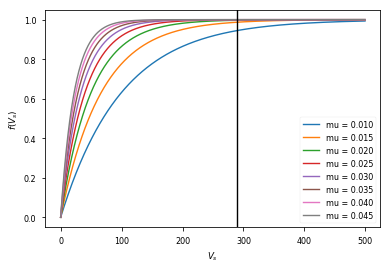

In [18]:
# Exponential or 'Tessier' for limiting Q or ET as a function of Vs
mus = np.arange(0.01, 0.05, 0.005) # Selection of values for mu
Vs = np.arange(0, 500, 0.5)        # Vs from 0 to above field capacity
fc = 290  # Field capacity (mm)

# Loop over mu values
for mu in mus:
#     f_Vs = 1 - np.exp(-mu*(Vs-(0.2*fc)))
    f_Vs = 1 - np.exp(-mu*(Vs))
    plt.plot(Vs, f_Vs, label='mu = %.3f' % mu)

plt.axvline(fc, c='k')
plt.legend(loc='best')
plt.ylabel('$f(V_s)$')
plt.xlabel('$V_s$')
plt.show()

-0.0230258509299
-0.0299573227355
-0.0460517018599
-0.0690775527898
-0.00511685576221
-0.00665718283012
-0.0102337115244
-0.0153505672866


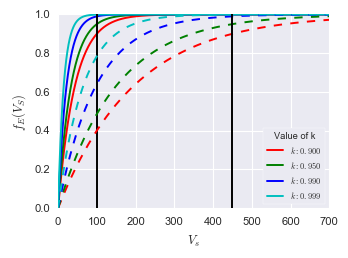

In [7]:
# Exponential or 'Tessier' with two different field capacities, calculating mu using field capacity

fcs = [100., 450.] # 'True' field capacity (mm)
ks = [0.90, 0.95, 0.99, 0.999] # Selection of values for k
Vs = np.arange(0, 700, 0.1)
c = ['r','g','b','c','m','y']
ls_d = {0:'-', 1:'--'}

fig = plt.figure(figsize=(3.5,2.5))
for ii, fc in enumerate(fcs): 
    for idx, k in enumerate(ks):
        mu = -np.log(1-k)/fc
        print mu
        f_Vs = 1 - np.exp(-mu*Vs)
        if ii == 0:
            plt.plot(Vs, f_Vs, color=c[idx], ls=ls_d[ii], label='$k: %.3f$' %k)
        else:
            plt.plot(Vs, f_Vs, color=c[idx], ls=ls_d[ii])
#         if fc == 100:
#             # Check the value of f_Vs when Vs = 0:
#             f_Vs0 = 1/(1 + np.exp(b*(100 - 0)))
#             print 'When Vs = 0, b= %.2f, f_V = %.5f' %(b, f_Vs0)
    plt.axvline(fc, c='k')
plt.xlabel('$V_s$', fontsize=9)
plt.ylabel('$f_E(V_S)$', fontsize=9)
legend = plt.legend(loc='best', prop={'size':6}, frameon=True, title='Value of k')
plt.setp(legend.get_title(),fontsize='x-small')
plt.show()
# plt.savefig(r'M:\Working\NewModel\Conceptual_Diagrams\ET_exponential.png',bbox_inches='tight',dpi=300)
# plt.close()